In [1]:
%pip install matplotlib seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('naruto.csv', encoding='latin-1')
df.head()
selected_columns = ['Num_episode', 'Title', 'Type', 'Rate', 'Saga']
naruto_df = df[selected_columns]
naruto_df.head()
naruto_filler_df = naruto_df[naruto_df['Type'] == 'Filler']
naruto_filler_df.head()

,Num_episode,Title,Type,Rate,Saga
27,28,Beasts! Alive Again!,Filler,7.1,s1 Kazekage Rescue
56,57,Robbed of Sleep,Filler,6.9,s3 Twelve Guardian Ninja
57,58,Loneliness,Filler,6.6,s3 Twelve Guardian Ninja
58,59,A New Enemy,Filler,6.5,s3 Twelve Guardian Ninja
59,60,Impermanence,Filler,6.7,s3 Twelve Guardian Ninja


In [17]:
naruto_canon_df = naruto_df[naruto_df['Type'] != 'Filler']
naruto_canon_df.shape
print(f"no of canon episodes: {naruto_canon_df.shape[0]}")
print(f"no of filler episodes: {naruto_filler_df.shape[0]}")
print(f"no of total episodes: {naruto_canon_df.shape[0] + naruto_filler_df.shape[0]}")
print(f"no of total episodes checked: {df.shape[0]}")

no of canon episodes: 297
no of filler episodes: 203
no of total episodes: 500
no of total episodes checked: 500


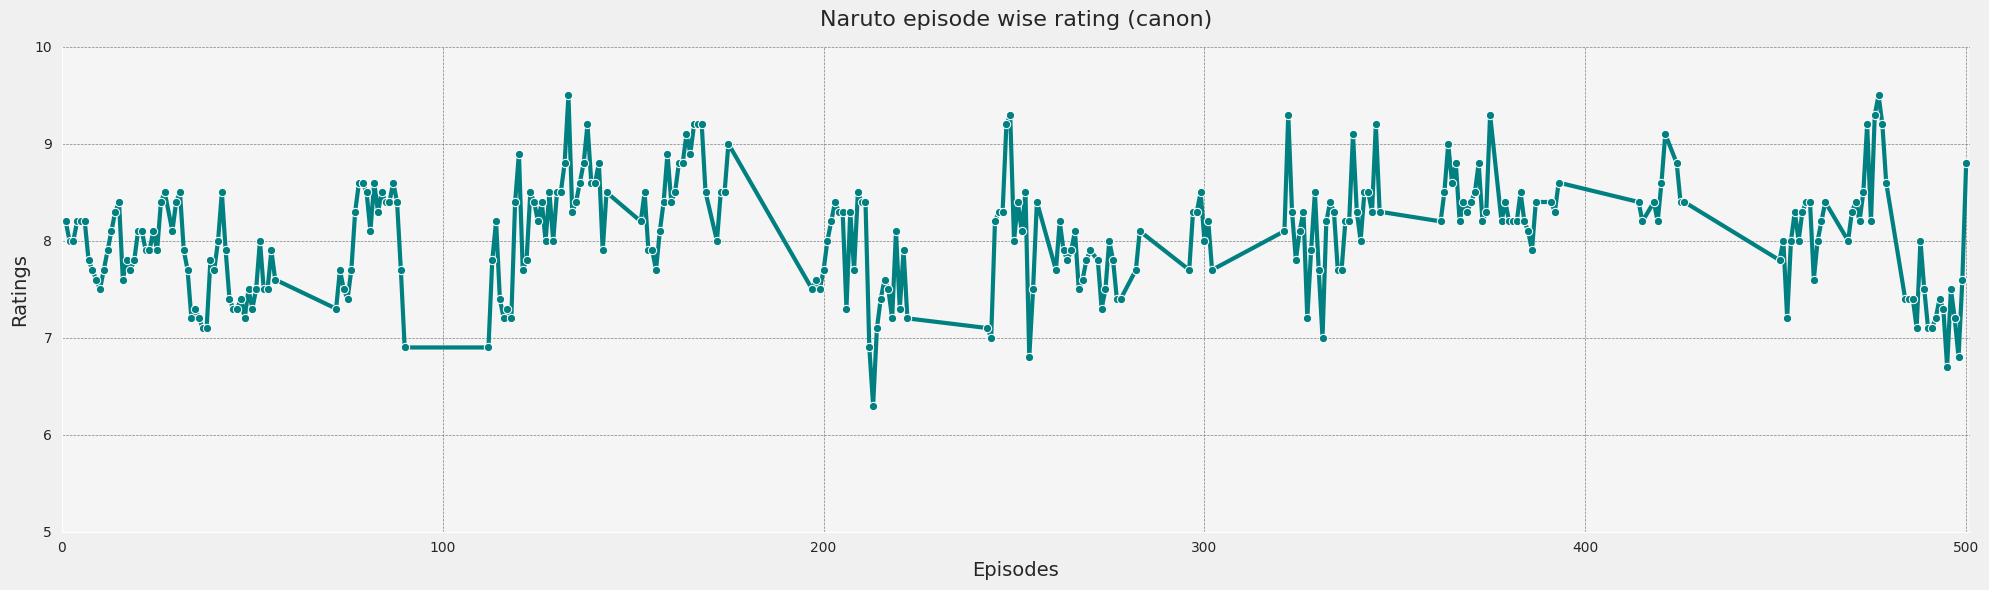

In [20]:
#canon graph
sns.set_style('darkgrid')

plt.figure(figsize=(20,6),  facecolor='#f0f0f0')
sns.lineplot(data = naruto_canon_df, x = 'Num_episode', y = 'Rate', marker = 'o', color='teal', linewidth=3, linestyle='-')

# for index, row in new_df1.iterrows():
#     if row['average_rating'] >= 9 or row['average_rating'] <= 7:
#         plt.annotate(
#             f"Ep {int(row['episode'])}: {row['average_rating']}",
#             xy=(row['episode'], row['average_rating']),
#             xytext=(0, 10),  # Offset above point
#             textcoords='offset points',
#             ha='center',
#             fontsize=10,
#             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8)
#         )

plt.title('Naruto episode wise rating (canon)', fontsize=16, pad=15)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.ylim(5, 10)
# plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, max(naruto_canon_df['Num_episode']) + 1)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tight_layout()

# plt.savefig('canon.png', dpi=300, bbox_inches='tight')
plt.show()

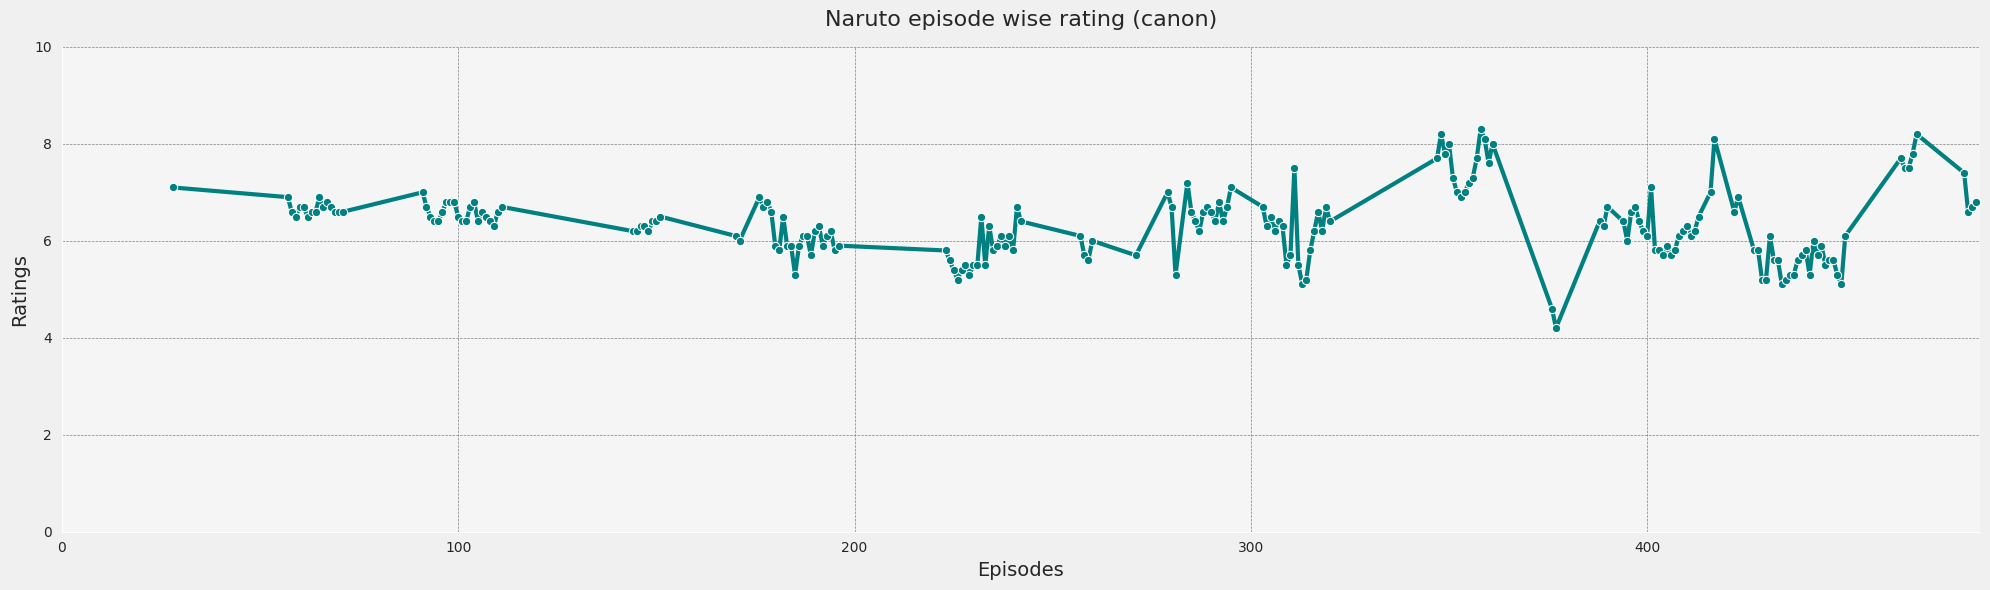

In [22]:
#filler graph
#canon graph
sns.set_style('darkgrid')

plt.figure(figsize=(20,6),  facecolor='#f0f0f0')
sns.lineplot(data = naruto_filler_df, x = 'Num_episode', y = 'Rate', marker = 'o', color='teal', linewidth=3, linestyle='-')

# for index, row in new_df1.iterrows():
#     if row['average_rating'] >= 9 or row['average_rating'] <= 7:
#         plt.annotate(
#             f"Ep {int(row['episode'])}: {row['average_rating']}",
#             xy=(row['episode'], row['average_rating']),
#             xytext=(0, 10),  # Offset above point
#             textcoords='offset points',
#             ha='center',
#             fontsize=10,
#             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8)
#         )

plt.title('Naruto episode wise rating (canon)', fontsize=16, pad=15)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.ylim(0, 10)
# plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, max(naruto_filler_df['Num_episode']) + 1)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tight_layout()

# plt.savefig('canon.png', dpi=300, bbox_inches='tight')
plt.show()


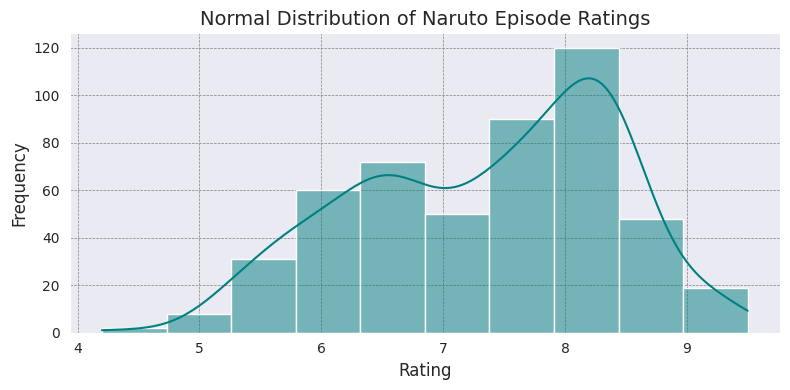

In [25]:
#normal distribution curvee
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Rate', kde=True, color='teal', bins=10)
plt.title('Normal Distribution of Naruto Episode Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plot_path = 'ratings_distribution.png'
# plt.savefig(plot_path, dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [27]:
total_episodes = len(df)
no_epi_above_9 = df[df['Rate'] >= 9].shape[0]
no_epi_above_8_5 = df[df['Rate'] >= 8.5].shape[0]
no_epi_below_8 = df[df['Rate'] < 8].shape[0]
percent_above_9 = (no_epi_above_9 / total_episodes) * 100
percent_above_8_5 = (no_epi_above_8_5 / total_episodes) * 100
percent_below_8 = (no_epi_below_8 / total_episodes) * 100
mean_rating = df['Rate'].mean()
percent_above_8_5

13.4

In [28]:
naruto_table = pd.DataFrame({
    'Anime Name' : ['Naruto Shippuden'],
    'Rating Above 9' : [no_epi_above_9],
    'Percentage Above 9' : [percent_above_9],
    'Rating Above 8.5' : [no_epi_above_8_5],
    'Percentage Above 8.5' : [percent_above_8_5],
    'Rating Below 8' : [no_epi_below_8],
    'Percentage Below 8' : [percent_below_8],
    'Mean Rating' : [mean_rating]
})
naruto_table

,Anime Name,Rating Above 9,Percentage Above 9,Rating Above 8.5,Percentage Above 8.5,Rating Below 8,Percentage Below 8,Mean Rating
0,Naruto Shippuden,19,3.8,67,13.4,313,62.6,7.3606


In [30]:
one_piece_table = pd.read_csv('one_piece_summary.csv')
one_piece_table

,Anime Name,Rating Above 9,Percentage Above 9,Rating Above 8.5,Percentage Above 8.5,Rating Below 8,Percentage Below 8,Mean Rating
0,One Piece,25,2.609603,115,12.004175,596,62.212944,7.796555


In [31]:
Full_table = pd.concat([naruto_table, one_piece_table], ignore_index = True)
Full_table

,Anime Name,Rating Above 9,Percentage Above 9,Rating Above 8.5,Percentage Above 8.5,Rating Below 8,Percentage Below 8,Mean Rating
0,Naruto Shippuden,19,3.800000,67,13.400000,313,62.600000,7.360600
1,One Piece,25,2.609603,115,12.004175,596,62.212944,7.796555


In [33]:
Full_table.to_csv('Naruto and One Piece comparison table.csv', index=False)
from google.colab import files
files.download('Naruto and One Piece comparison table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>